# Homework 3 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (30 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Handle the missing values in the datasets. Briefly explain. **-5 points**

In [1]:
import pandas as pd
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isna().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

The only columns that have missing values are Embarked, Age, and Cabin.

1. We will remove the rows with missing embarkation values
2. For age, null values will be replaced with the mean age
3. We will remove the column of cabin because there are far too many missing data points for cabin so the model may not be accurate if we include the cabin data


In [10]:
train_new = train.dropna(subset=['Embarked'])
mean_age = train_new['Age'].mean()
train_new['Age'].fillna(mean_age, inplace=True)
train_new = train_new.drop('Cabin', axis=1)
print(train_new.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


/var/folders/rv/hd876kss68148qrgkftj79l80000gn/T/ipykernel_22584/2167539730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['Age'].fillna(mean_age, inplace=True)


b) Add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

Group size could be an interesting feature to look at. Maybe there is a correlation between a large group and survival aboard the Titanic because you may receive more help

In [11]:
train_new['GroupSize'] = train_new['SibSp'] + train_new['Parch'] + 1
train_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,GroupSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


Another feature that could potentially be useful is categorizing age groups. Maybe younger and older people have lower survival rates than that of healthy middle aged adults. 

In [13]:
bins = [0, 18, 35, 50, 100] 
labels = ['0-18', '19-35', '36-50', '51+']  
train_new['Age_Group'] = pd.cut(train_new['Age'], bins=bins, labels=labels, include_lowest=True)
train_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,GroupSize,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,19-35
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,36-50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,19-35
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,19-35
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,19-35


c) Split the dataset into training and testing. Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain with a plot presenting in x-axis the `max_depth` and in y-axis the accuracy (both training and testing). **- 10 points**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'GroupSize']
df = train_new
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
df = df.dropna()
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_value = 4
model = DecisionTreeClassifier(max_depth=max_depth_value, random_state=42)
model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4, random_state=42)

d) Plot the decision tree. Briefly explains how it works. **- 5 points**

A decision tree starts at a root node, and then for each node, it displays a condition. Its children are the different outcomes of those conditions. The leaf nodes are the nodes that make the predictions for a model. Each node has a gini value that determines the threshold for each split. 

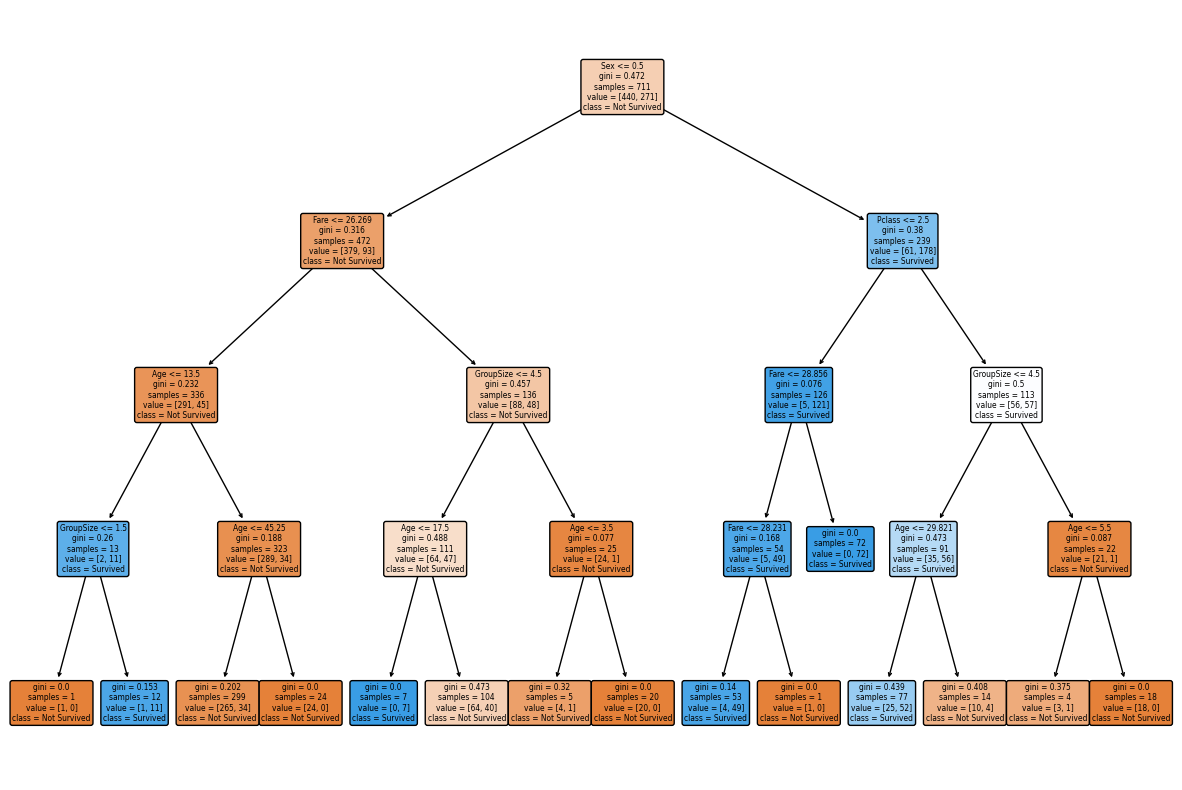

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()


e) Plot the confusion matrix of the above classifier. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 5 points**

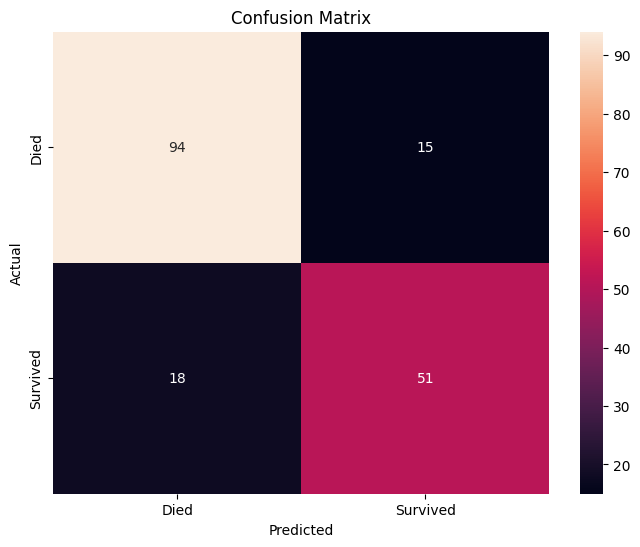

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
confusion = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Some pitfall of the model are...
- It considers all the people below 5.5 years of age to have not survived the titanic crash
- Another pitfall is that for some leaf nodes, there are very little samples, so the predictions are based on a small sample size.

# Exercise 2 (30pts)

Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

In this task, you are asked to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs.

**Note**: Your cannot use the random forests model from sklearn or any other library, but you can use any library that implements an individual decision tree.

a) Construct a Random Forest Classifier using the template below. Use it on the training set you defined earlier with an arbitrary number of trees and tree depth and evaluate it on the test set you defined earlier. **-- 10pts**

In [56]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

class Random_Forest():

    def __init__(self,num_trees, max_depth, criterion='gini'):
        self.max_depth = max_depth
        self.criterion = criterion
        self.decision_trees = [DecisionTreeClassifier(max_depth=self.max_depth) for _ in range(num_trees)]

    def _fit_tree(self, X, y, idx):
        self.decision_trees[idx].fit(X, y)

    def fit(self, X, y):
        for idx in range(len(self.decision_trees)):
            X_sample, y_sample = self._sample(X, y)
            self._fit_tree(X_sample, y_sample, idx)
    
    def _sample(self, X, y):
        sample_indices = np.random.choice(len(X), size=len(X), replace=True)
        X_sampled, y_sampled = X.iloc[sample_indices], y.iloc[sample_indices]
        return X_sampled, y_sampled

    def _majority(self,predictions):
        return np.bincount(predictions).argmax()
    
    def predict(self, X_test):
        predictions = np.array([tree.predict(X_test) for tree in self.decision_trees])
        ensemble_predictions = np.apply_along_axis(self._majority, axis=0, arr=predictions)
        return ensemble_predictions


b) Experiment with

 - different max depths = 5,10,15
 - different number of trees [10,50,100,500,1000]
 - different information criteria ['gini index', 'entropy'] 

Report the accuracy of your best and worst models, and compare them with the accuracy of the decision tree from **1c**. What observations did you make on Random Forests as a whole? **-- 15pts**

In [58]:
from sklearn.metrics import accuracy_score

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'GroupSize']
df = train_new
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
df = df.dropna()
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depths = [5, 10, 15]
num_trees_values = [10, 50, 100, 500, 1000]
criterions = ['gini', 'entropy']
best_accuracy = 0.0
worst_accuracy = 1.0
best_model_params = None
worst_model_params = None

for max_depth in max_depths:
    for num_trees in num_trees_values:
        for criterion in criterions:
            rf_model = Random_Forest(num_trees=num_trees, max_depth=max_depth, criterion=criterion)
            rf_model.fit(X_train, y_train)
            y_pred_rf = rf_model.predict(X_test)
            accuracy_rf = accuracy_score(y_test, y_pred_rf)
            if accuracy_rf > best_accuracy:
                best_accuracy = accuracy_rf
                best_model_params = (max_depth, num_trees, criterion)
            if accuracy_rf < worst_accuracy:
                worst_accuracy = accuracy_rf
                worst_model_params = (max_depth, num_trees, criterion)
            print(f"Max Depth: {max_depth}, Num Trees: {num_trees}, Criterion: {criterion}, Accuracy: {accuracy_rf:.4f}")

Max Depth: 5, Num Trees: 10, Criterion: gini, Accuracy: 0.8258
Max Depth: 5, Num Trees: 10, Criterion: entropy, Accuracy: 0.8315
Max Depth: 5, Num Trees: 50, Criterion: gini, Accuracy: 0.8146
Max Depth: 5, Num Trees: 50, Criterion: entropy, Accuracy: 0.8258
Max Depth: 5, Num Trees: 100, Criterion: gini, Accuracy: 0.8146
Max Depth: 5, Num Trees: 100, Criterion: entropy, Accuracy: 0.8146
Max Depth: 5, Num Trees: 500, Criterion: gini, Accuracy: 0.8202
Max Depth: 5, Num Trees: 500, Criterion: entropy, Accuracy: 0.8146
Max Depth: 5, Num Trees: 1000, Criterion: gini, Accuracy: 0.8146
Max Depth: 5, Num Trees: 1000, Criterion: entropy, Accuracy: 0.8202
Max Depth: 10, Num Trees: 10, Criterion: gini, Accuracy: 0.8034
Max Depth: 10, Num Trees: 10, Criterion: entropy, Accuracy: 0.8034
Max Depth: 10, Num Trees: 50, Criterion: gini, Accuracy: 0.8034
Max Depth: 10, Num Trees: 50, Criterion: entropy, Accuracy: 0.7978
Max Depth: 10, Num Trees: 100, Criterion: gini, Accuracy: 0.8034
Max Depth: 10, Num T

The best model has an accuracy of ~82% while the worst model has an accuracy of ~76%

The decision tree is more simple and easier to interpret while a random forest classifier is more complex to visualize but more accurate. 

c)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$C_{i} = \text{Count of elements belonging to class 'i'}$
$C = \text{Total Number of Elements}$

Consider we have a total of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column. **--5pts**

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below.

In [1]:
import math

entropy_parent = -(15/34 * math.log2(15/34) + 19/34 * math.log2(19/34))
entropy_child1 = -(9/13 * math.log2(9/13) + 4/13 * math.log2(4/13))
entropy_child2 = -(6/21 * math.log2(6/21) + 15/21 * math.log2(15/21))
information_gain = entropy_parent - (13/34 * entropy_child1 + 21/34 * entropy_child2)

print(information_gain)

0.11640681324126456


## Exercise 3 (40 Points)

For this question we will use Sonar dataset from sklearn.datasets, which contains sonar signals for classifying objects as either "rock" or "mine."

In [2]:
from sklearn.datasets import fetch_openml

sonar = fetch_openml(name="sonar", version=1)

X = sonar.data  
y = sonar.target  

/Users/kelvin/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


a) Begin by creating a training and testing datasest from the dataset, with a 80-20 ratio, and random_state=1. **1 pt**

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) Train a KNN classifier on the training set to classify sonar signals as either "Rock" or "Mine." Use cross-validation to find an appropriate value of K. Evaluate and print the model's performance on the testing set using accuracy. **-- 9 points**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

k_values = list(range(1, 21))  
cv_accuracies = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    cv_accuracies.append(cv_scores.mean())

best_k = k_values[cv_accuracies.index(max(cv_accuracies))]
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)
y_pred = best_knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best K: {best_k}")
print(f"Accuracy on Testing Set: {accuracy:.4f}")

Best K: 1
Accuracy on Testing Set: 0.7619


c) Using any combination of the classification tools we've discussed in class:

- KNN
- Naive Bayes
- SVM
- Decision Tree (including Random Forests)
- Ensemble Methods (AdaBoost, Bagging)

You may also use feature extraction tools like PCA. Train and tune a model on the training set and evaluate its performance on the test set using accuracy. **-- 30 points**

 * accuracy > .95 **-- 30 points**
 * accuracy between 0.94 and 0.95 **-- 25 points**
 * accuracy between 0.92 and 0.94 **-- 20 points**
 * accuracy between 0.9 and 0.92 **-- 15 points**
 * accuracy between 0.85 and 0.9 **-- 10 points**
 * accuracy between 0.8 and 0.85 **-- 7 points**
 * accuracy between 0.7 and 0.8 **-- 5 points**
 * accuracy < 0.7 **-- 3 points**

In [46]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

iso_forest = IsolationForest(contamination=0.1, random_state=42)  
outlier_preds = iso_forest.fit_predict(X)
X_filtered = X[~(outlier_preds == -1)]
y_filtered = y[~(outlier_preds == -1)]
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_filtered)
pca = PCA(n_components=15)  
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_filtered, test_size=0.3, random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}
nested_cv = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')
nested_scores = cross_val_score(nested_cv, X_pca, y_filtered, cv=5)
best_gb_model = nested_cv.fit(X_pca, y_filtered)
y_pred = best_gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


# Bonus (15pts)

In this bonus we will implement 1-dimensional GMM clustering algorithm from scratch. A GMM distribution is composed of `k` components, each characterized by:

1. A mixture proportion
2. A mean for its Normal Distribution
3. A variance for its Normal Distribution

So, to generate a dataset that follows a GMM distrbution we need a list of those parameters. In this exercise we will use a class called `Component` to capture the parameters for a given component. And a GMM will be a list of `Component`s.

In [70]:
class Component:
    def __init__(self, mixture_prop, mean, variance):
        self.mixture_prop = mixture_prop
        self.mean = mean
        self.variance = variance

example_gmm = [Component(.5, 5, 1), Component(.5, 8, 1)]


a) Complete the function below to validate and generate a dataset following a GMM distribution, given a specified set of GMM parameters as above and a size. You may only use the methods already imported in the cell. (10pts)

In [77]:
from numpy.random import normal, uniform

def generate_gmm_dataset(gmm_params, size):
    if not is_valid_gmm(gmm_params):
        raise ValueError("GMM parameters are invalid")
    dataset = []
    for _ in range(size):
        comp = get_random_component(gmm_params)
        dataset += [normal(comp.mean, comp.variance)]
    return dataset

def is_valid_gmm(gmm_params):
    '''
        Checks that the sum of the mixture
        proportions is 1
    '''
    return abs(sum(comp.mixture_prop for comp in gmm_params) - 1.0) < 1e-10

def get_random_component(gmm_params):
    '''
        returns component with prob
        proportional to mixture_prop
    '''
    rand_value = np.random.uniform(0, 1)
    cumulative_prob = 0
    for comp in gmm_params:
        cumulative_prob += comp.mixture_prop
        if rand_value <= cumulative_prob:
            return comp


# test your code: this should return a list of 10 numbers similar to worksheet 8
data = generate_gmm_dataset(example_gmm, 10)
print(data)

[9.087528057661547, 8.484034116835113, 7.770157334209654, 8.619707922379247, 7.91365325118512, 9.148699049723612, 2.9907778769797564, 4.801683301614993, 7.508323808820703, 8.542793307483343]


b) Finish the implementation below of the Expectation-Maximization Algorithm. Only use methods that have been imported in the cell. Visualize the output of your code by plotting the original mixture distribution curves and the ones learned by the EM algorithm. (15pts)

In [87]:
from scipy.stats import norm
from numpy import array, argmax
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def gmm_init(k, dataset):
    kmeans = KMeans(k, init='k-means++').fit(X=array(dataset).reshape(-1, 1))
    gmm_params = []
    for j in range(k):
        mean_j = np.random.choice(dataset)
        var_j = np.var(dataset)
        mixture_prop_j = 1 / k  
        gmm_params.append({'mean': mean_j, 'variance': var_j, 'mixture_prop': mixture_prop_j})
    return gmm_params


def compute_gmm(k, dataset, probs):
    '''
        Compute P(C_j), mean_j, var_j
    '''
    gmm_params = []
    for j in range(k):
        sum_probs = sum(probs[i][j] for i in range(len(dataset)))
        mean_j = sum(probs[i][j] * dataset[i] for i in range(len(dataset))) / sum_probs
        var_j = sum(probs[i][j] * (dataset[i] - mean_j)**2 for i in range(len(dataset))) / sum_probs
        mixture_prop_j = sum_probs / len(dataset)
        gmm_params.append({'mean': mean_j, 'variance': var_j, 'mixture_prop': mixture_prop_j})
    return gmm_params


def compute_probs(k, dataset, gmm_params):
    '''
        For all x_i in dataset, compute P(C_j | X_i)
        = P(X_i | C_j)P(C_j) / P(X_i) for all C_j
        return the list of lists of all P(C_j | X_i)
        for all x_i in dataset.
    '''
    probs = []
    for i in range(len(dataset)):
        probs_xi = [gmm_params[j]['mixture_prop'] * norm.pdf(dataset[i], gmm_params[j]['mean'], gmm_params[j]['variance']) for j in range(k)]
        sum_probs_xi = sum(probs_xi)
        probs.append([prob_xi / sum_probs_xi for prob_xi in probs_xi])
    return probs


def expectation_maximization(k, dataset, iterations):
    '''
        Repeat for a set number of iterations.
    '''
    gmm_params = gmm_init(k, dataset)
    for _ in range(iterations):
        # expectation step
        probs = compute_probs(k, dataset, gmm_params)

        # maximization step
        gmm_params = compute_gmm(k, dataset, probs)

    return probs, gmm_params

Notes:

1. your code should work with any number of components, each with reasonable parameters.
2. your code should work for 1 to about 5 iterations of the EM algorithm. It may not work for iterations over 10 because the math we are doing may overflow and create `nans` - that's ok / don't worry about it.

/Users/kelvin/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


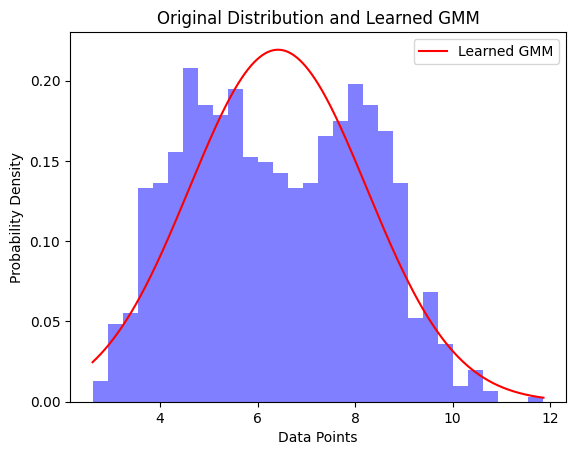

In [88]:
import numpy as np

def plot_gmm_curves(gmm_params, dataset):
    x = np.linspace(min(dataset), max(dataset), 1000)
    y = np.zeros_like(x)

    for j in range(len(gmm_params)):
        y += gmm_params[j]['mixture_prop'] * norm.pdf(x, gmm_params[j]['mean'], np.sqrt(gmm_params[j]['variance']))

    plt.hist(dataset, bins=30, density=True, alpha=0.5, color='blue')  
    plt.plot(x, y, color='red', label='Learned GMM')
    plt.legend()
    plt.title('Original Distribution and Learned GMM')
    plt.xlabel('Data Points')
    plt.ylabel('Probability Density')
    plt.show()


k = 2
dataset = generate_gmm_dataset(example_gmm, 1000) 
iterations = 10
probs, learned_params = expectation_maximization(k, dataset, iterations)
plot_gmm_curves(learned_params, dataset)
